# Gradient Boosting

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/gradient-boosting.ipynb)

Le boosting de gradients est une technique d'apprentissage automatique utilisée pour améliorer les performances des modèles d'ensemble, tels que les arbres de décision. Il fonctionne en entraînant itérativement une série de modèles faibles, généralement des [arbres de décision](./decision-trees.ipynb) simples, en se concentrant sur les exemples mal classés par les modèles précédents. À chaque itération, les poids sont attribués aux exemples en fonction de leurs erreurs, donnant ainsi plus d'importance aux exemples mal classés.

Le modèle final est obtenu en combinant les prédictions de tous les modèles faibles, chaque modèle ayant un poids qui dépend de sa performance. Cette approche séquentielle permet au modèle de s'améliorer progressivement en se concentrant sur les erreurs précédentes, ce qui le rend robuste et performant.

Le boosting de gradients est largement utilisé dans diverses applications, notamment la classification, la régression et la détection d'anomalies, car il permet d'obtenir de très bonnes performances en exploitant la force de plusieurs modèles faibles pour construire un modèle fort.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/Gradient_boosting)

In [47]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U 'lightgbm[scikit-learn]' # On macOS, check https://github.com/microsoft/LightGBM/issues/6035
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U xgboost

## Données

Création d'un jeu de données synthétiques:

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

X, y = make_classification(
    n_features=2,
    n_samples=500,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=.9,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=random_state,
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Check shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

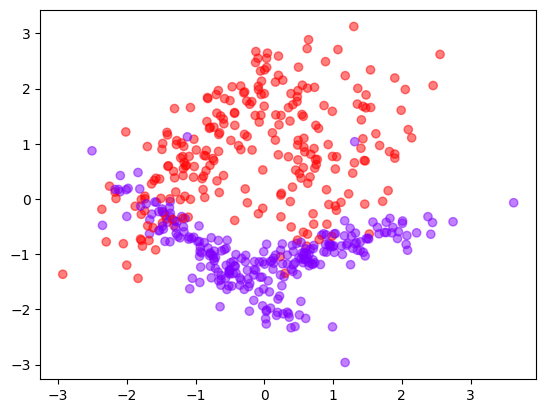

In [49]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap=plt.cm.rainbow)

## Gradient Boosting with SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(n_estimators=50, max_depth=2, learning_rate=0.05, random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 0.9325
Test accuracy: 0.88


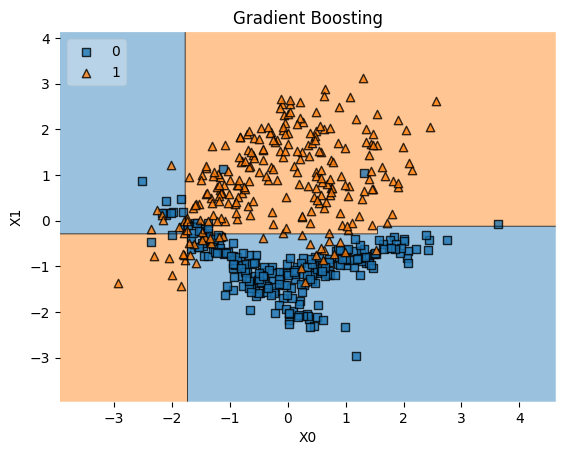

In [51]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Gradient Boosting')
plt.show()

## Gradient Boosting with XGBoost

Docs: https://xgboost.readthedocs.io/en/stable/python/sklearn_estimator.html

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

clf = XGBClassifier(n_estimators=50, learning_rate=0.05, objective='binary:logistic', random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

Train accuracy: 0.9625
Test accuracy: 0.91


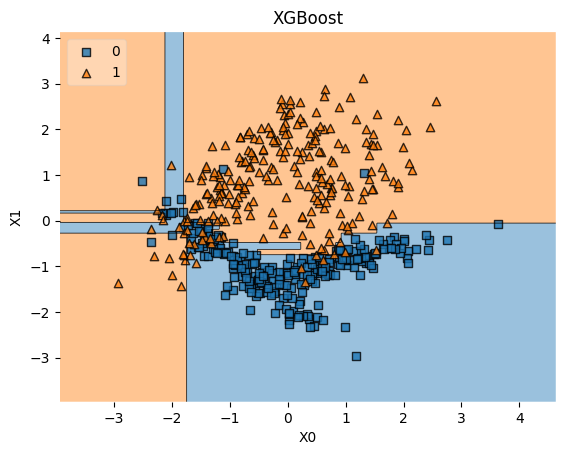

In [53]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('XGBoost')
plt.show()

## Gradient Boosting with LightGBM

Docs: https://lightgbm.readthedocs.io/en/stable/pythonapi/lightgbm.LGBMClassifier.html

In [54]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

clf = LGBMClassifier(n_estimators=50, learning_rate=0.05, random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Train accuracy:", accuracy_score(y_train, clf.predict(X_train)))
print("Test accuracy:", accuracy_score(y_test, clf.predict(X_test)))

[LightGBM] [Info] Number of positive: 192, number of negative: 208
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480000 -> initscore=-0.080043
[LightGBM] [Info] Start training from score -0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

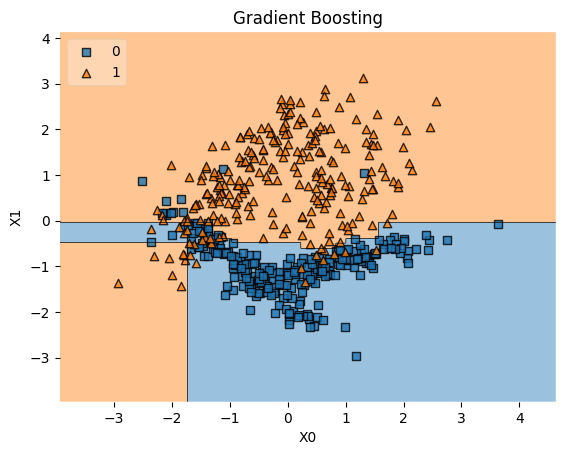

In [55]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Gradient Boosting')
plt.show()